In [1]:
import nltk 
import pandas as pd 
from nltk.tokenize import *
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import *
import re
from nltk.stem import * 
from nltk import FreqDist
import math
import matplotlib 
%matplotlib inline

In [23]:
df = pd.read_excel('MT_result.xlsx')
df.head()

,num,Name,apple_content Rating,True Rating,Diff apple_true,apple Rating Level,True Rating Level,matching method,g_original index,content_rating,google_content_rating level,diff_google_true,cusrating_score,rating_num,current version,description
0,0.0,subway surfers,9.0,4.0,1,2.0,1.0,preliminary match,354.0,Everyone 10+,2.0,1.0,4.4,21272652.0,1.63.1,DASH as fast as you can! DODGE the oncoming tr...
1,1.0,temple run,9.0,9.0,0,2.0,2.0,preliminary match,352.0,Everyone,1.0,-1.0,4.3,3232753.0,1.6.2,The addictive mega-hit Temple Run is now out f...
2,2.0,temple run 2,9.0,9.0,0,2.0,2.0,preliminary match,356.0,Everyone,1.0,-1.0,4.3,6693086.0,0,"With over a zillion downloads, Temple Run rede..."
3,3.0,clash of clans,9.0,9.0,0,2.0,2.0,preliminary match,1649.0,Everyone 10+,2.0,0.0,4.6,31202589.0,8.551.24,From rage-filled Barbarians with glorious must...
4,4.0,fruit ninja free,4.0,4.0,0,1.0,1.0,preliminary match,1521.0,Everyone,1.0,0.0,4.3,4471142.0,2.4.2.436758,"Slice fruit, dont slice bombs thats all you n..."


In [24]:
#delete no match
df = df[df['matching method']!='no match']

In [25]:
df.shape

(76, 16)

In [51]:
df_g1 = df[df['content_rating']=='Everyone']
df_g2 = df[df['content_rating']=='Everyone 10+']
df_g3 = df[df['content_rating']=='Teen']
df_g4 = df[df['content_rating']=='Mature 17+']


## True rating 'description' dictionary 

In [34]:
df_t1=df[df['True Rating Level']==1.0] 
df_t2=df[df['True Rating Level']==2.0] 
df_t3=df[df['True Rating Level']==3.0] 
df_t4=df[df['True Rating Level']==4.0] 

In [62]:
#Preliminary text process 
def process_all(inputdf):
    des = inputdf['description']
    des = des.str.lower()
    des = des.reset_index()
    des = des['description']
    
    ##tokenize
    tokens= []
    for i in range(len(des)):
        tokens = tokens + tokenizer.tokenize(str(des[i])) 
         # + to make all of them into a list, not a list group 
        tokens_new=[]
    #remove digit and only one letter word
    for word in tokens: 
        if not (word.isdigit() or re.match(r'^[a-z]$',word)):
            tokens_new.append(word)
            
    #remove stop word
    stop_words = set(stopwords.words("english"))
    tokens2 = [w for w in tokens_new if not w in stop_words]
    
    #stemming
    wnl = WordNetLemmatizer()
    token3=[wnl.lemmatize(w) for w in tokens2]
    
    #str every word
    token4 = [str(w) for w in token3]
    wordfreq = FreqDist(token4)
    
    return wordfreq

In [82]:
freq_t_all = process_all(df)

In [83]:
freqall_t_df = pd.DataFrame.from_dict(freq_t_all, orient = 'index')
freqall_t_df = freqall_t_df.sort_values([0],ascending = [False])
freqall_t_df.shape

(3063, 1)

In [84]:
#remove top 50 frequency words as stop words

freqall_t_w = list(freqall_t_df[:50].index)
freqall_t_w

['game',
 'com',
 'http',
 'www',
 'play',
 'free',
 'use',
 'may',
 'policy',
 'real',
 'player',
 'privacy',
 'facebook',
 'app',
 'level',
 'new',
 'mobile',
 'term',
 'feature',
 'racing',
 'friend',
 'twitter',
 'fun',
 'time',
 'get',
 'u',
 'take',
 'skill',
 'purchase',
 'service',
 'best',
 'challenge',
 'world',
 'data',
 'device',
 'also',
 'see',
 'halfbrick',
 'internet',
 'experience',
 'follow',
 'way',
 'like',
 'battle',
 'help',
 'social',
 'different',
 'control',
 'please',
 '3d']

In [85]:
def process(inputdf):
    des = inputdf['description']
    des = des.str.lower()
    des = des.reset_index()
    des = des['description']
    
    ##tokenize
    tokens= []
    for i in range(len(des)):
        tokens = tokens + tokenizer.tokenize(str(des[i])) 
         # + to make all of them into a list, not a list group 
        tokens_new=[]
    #remove digit and only one letter word
    for word in tokens: 
        if not (word.isdigit() or re.match(r'^[a-z]$',word)):
            tokens_new.append(word)
            
    #remove stop word
    stop_words = set(stopwords.words("english"))
    tokens2 = [w for w in tokens_new if not w in stop_words]
    
    #stemming
    wnl = WordNetLemmatizer()
    token3=[wnl.lemmatize(w) for w in tokens2]
    
    #remove high frequency words
    token4 = [str(w) for w in token3 if not w in freqall_t_w]

    wordfreq = FreqDist(token4)
    
    return wordfreq

In [86]:
freqt1 = process(df_t1)
freqt2 = process(df_t2)
freqt3 = process(df_t3)
freqt4 = process(df_t4)

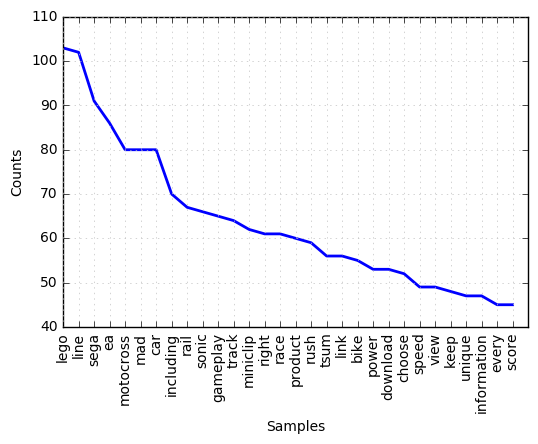

In [182]:
freqt1.plot(30)

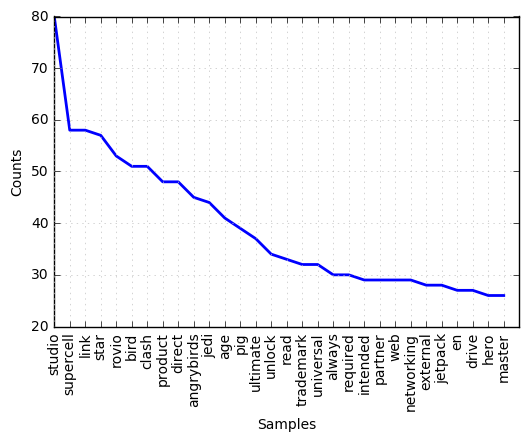

In [183]:
freqt2.plot(30)

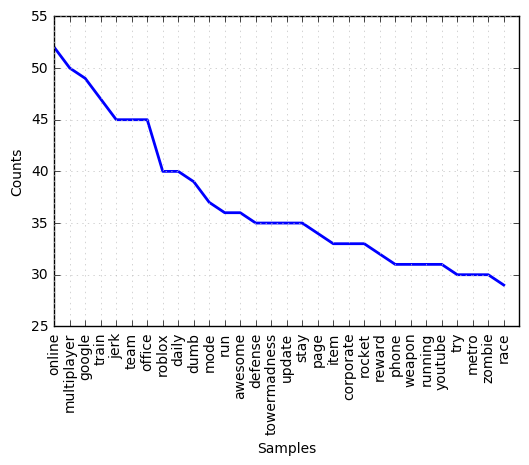

In [185]:
freqt3.plot(30)

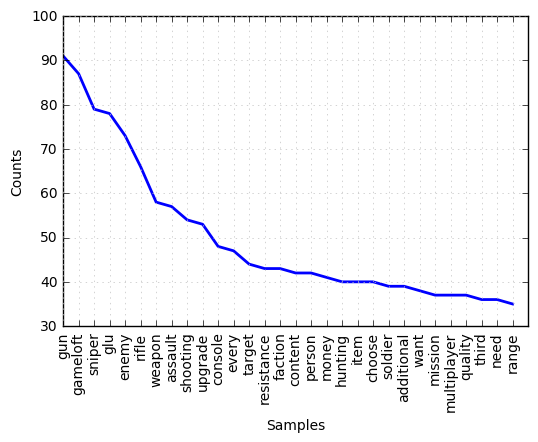

In [186]:
freqt4.plot(30)

In [87]:
#convert frequency dictionary into dataframe, in order to sort and filter
def convert_freq_to_df(freq):
    outdf = pd.DataFrame.from_dict(freq, orient = 'index')
    outdf = outdf.sort_values([0],ascending = [False])
    
    #take the first 30 words as dictionary 
    outdf = outdf[:30] 
    
    return outdf

In [88]:
outdf_t1 = convert_freq_to_df(freqt1)
outdf_t2 = convert_freq_to_df(freqt2)
outdf_t3 = convert_freq_to_df(freqt3)
outdf_t4 = convert_freq_to_df(freqt4)

In [75]:
outdf_t1

,0
lego,103
line,102
sega,91
ea,86
mad,80
car,80
motocross,80
including,70
rail,67
sonic,66


In [76]:
outdf_t2

,0
studio,80
link,58
supercell,58
star,57
rovio,53
bird,51
clash,51
direct,48
product,48
angrybirds,45


In [47]:
outdf_t3

,0
online,52
multiplayer,50
google,49
train,47
office,45
team,45
jerk,45
daily,40
roblox,40
dumb,39


In [48]:
outdf_t4

,0
gun,91
gameloft,87
sniper,79
glu,78
enemy,73
rifle,66
weapon,58
assault,57
shooting,54
upgrade,53


In [89]:
for index, row in outdf_t4.iterrows():
    print type(index)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


## Process google rating 

In [90]:
freq_g1 = process_all(df_g1)
freq_g2 = process_all(df_g2)
freq_g3 = process_all(df_g3)
freq_g4 = process_all(df_g4)

In [91]:
freq_g1

FreqDist({'limited': 4,
          'motocross': 80,
          'consider': 1,
          'child': 10,
          'dynamic': 13,
          'splitting': 3,
          'month': 9,
          'four': 5,
          'catch': 6,
          'earwormy': 5,
          'scheming': 10,
          'frostbite': 2,
          'hate': 6,
          'forget': 5,
          'otro': 3,
          'responsiveness': 4,
          'hunting': 3,
          'sweetest': 5,
          'tail': 8,
          'bike': 55,
          'voted': 8,
          'competitorsuniversal': 11,
          'lord': 4,
          'worth': 3,
          'minigames': 2,
          'started': 12,
          'contactus': 8,
          'updated': 3,
          'slidetoplaygame': 3,
          'premium': 5,
          'risk': 5,
          'straightforward': 10,
          'far': 28,
          'horror': 5,
          'rise': 6,
          'stolen': 2,
          'every': 59,
          'surprise': 11,
          'laser': 6,
          'trailer': 27,
          'look': 5,
 

In [92]:
freq_g1['bike']

55

In [93]:
freq_list = [freq_g1,freq_g2,freq_g3,freq_g4]

In [109]:
freq_list[0] == freq_g1

True

In [126]:

def count_freq(outdf):
    outdf['g1']=0
    outdf['g2']=0
    outdf['g3']=0
    outdf['g4']=0
    for index, row in outdf.iterrows():
        for i in range(4): 
            row['g'+str(i+1)] = freq_list[i][str(index)] 
            
            
            
    return outdf 

In [127]:

outdf_t1_n = count_freq(outdf_t1)
outdf_t2_n = count_freq(outdf_t2)
outdf_t3_n = count_freq(outdf_t3)
outdf_t4_n = count_freq(outdf_t4)

In [141]:
true_list = [outdf_t1_n,outdf_t2_n,outdf_t3_n,outdf_t4_n]

In [128]:
outdf_t1_n

,0,g1,g2,g3,g4
lego,103,103,0,0,0
line,102,104,0,17,0
sega,91,91,0,0,0
ea,86,86,0,0,0
mad,80,80,0,0,0
car,80,80,10,0,18
motocross,80,80,0,0,0
including,70,70,0,15,16
rail,67,67,0,0,0
sonic,66,66,0,0,0


In [125]:
sum(freq_g1.values())

24002

In [131]:
outdf_t4_n['g4'].sum()

735

In [142]:
sum(outdf_t4_n['g4'])

735

In [152]:
table = pd.DataFrame(0,index = ['Google1','Google2','Google3','Google4'], 
                    columns = ['Dictionary1','Dictionary2','Dictionary3','Dictionary4'])


In [150]:
for i in range(4):
    for j in range(4):
        table.iloc[i,j] = float(sum(true_list[j]['g'+str(i+1)]))/sum(freq_list[i].values())*100

In [151]:
table

,Dictionary1,Dictionary2,Dictionary3,Dictionary4
Google1,8.574285,4.887093,2.270644,2.053996
Google2,2.156255,9.378231,3.263920,3.367302
Google3,1.929634,1.080885,7.733043,7.384839
Google4,1.986014,1.160839,4.013986,10.279720


## Misrating apps analysis

In [154]:
misapp = df[df['diff_google_true'] != 0.0]

In [157]:
misapp.columns

Index([u'num', u'Name', u'apple_content Rating', u'True Rating',
       u'Diff apple_true', u'apple Rating Level', u'True Rating Level',
       u'matching method', u'g_original index', u'content_rating',
       u'google_content_rating level', u'diff_google_true', u'cusrating_score',
       u'rating_num', u'current version ', u'description'],
      dtype='object')

In [158]:
misapp = misapp.loc[:,['num','True Rating Level','google_content_rating level', 'description']]

In [160]:
misapp = misapp.iloc[:-1, :]

In [163]:
misapp.reset_index()

,index,num,True Rating Level,google_content_rating level,description
0,0,0.0,1.0,2.0,DASH as fast as you can! DODGE the oncoming tr...
1,1,1.0,2.0,1.0,The addictive mega-hit Temple Run is now out f...
2,2,2.0,2.0,1.0,"With over a zillion downloads, Temple Run rede..."
3,10,10.0,4.0,3.0,Return to the wilderness in the most visually ...
4,31,31.0,3.0,2.0,Welcome to the ultimate virtual universe power...
5,34,34.0,4.0,1.0,Happy Wheels is a free game with realistic phy...
6,41,41.0,4.0,3.0,Step into the action of the audio-visual spect...
7,46,47.0,4.0,2.0,TOP 5 APP FEATURED AROUND THE WORLD Experien...
8,47,60.0,1.0,0.0,The F/A-18 Hornet and Carrier landing missions...
9,52,52.0,4.0,3.0,"High-end, immersive tablet gameplay!You are Ja..."


In [167]:
def process_description(inputrow):
    des = inputrow['description']
    des = str(des)
    des = des.lower()
 
    ##tokenize
    tokens =tokenizer.tokenize(des) 
    
    #stemming
    wnl = WordNetLemmatizer()
    token3=[wnl.lemmatize(w) for w in tokens]
    
    #str every word
    token4 = [str(w) for w in token3]
    wordfreq = FreqDist(token4)
    
    return wordfreq

In [171]:
def write_dictionary(row, wordfreq): 
    for i in range(4):
        count = 0 
        for k,v in wordfreq.items():
            if k in true_list[i].index:
                count += v   
                
        row['Dictionary'+str(i+1)]=float(count)/sum(wordfreq.values())*100
    

In [181]:
misapp['Dictionary1'] = 0
misapp['Dictionary2'] = 0
misapp['Dictionary3'] = 0
misapp['Dictionary4'] = 0

for index, row in misapp.iterrows():
    wordfreq = process_description(row)
    for i in range(4):
        count = 0 
        indexlist = [str(w) for w in true_list[i].index]
        print indexlist
        for k,v in wordfreq.items():
            if k in indexlist:
                count += v   
                
        row['Dictionary'+str(i+1)]=float(count)/sum(wordfreq.values())*100
        
  #  write_dictionary(row,wordfreq)
    

/Users/gongzeyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gongzeyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/gongzeyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


['lego', 'line', 'sega', 'ea', 'mad', 'car', 'motocross', 'including', 'rail', 'sonic', 'gameplay', 'track', 'miniclip', 'race', 'right', 'product', 'rush', 'tsum', 'link', 'bike', 'power', 'download', 'choose', 'speed', 'view', 'keep', 'unique', 'information', 'one', 'city']
['studio', 'link', 'supercell', 'star', 'rovio', 'bird', 'clash', 'direct', 'product', 'angrybirds', 'jedi', 'age', 'pig', 'ultimate', 'unlock', 'read', 'trademark', 'universal', 'required', 'always', 'partner', 'networking', 'intended', 'web', 'external', 'jetpack', 'drive', 'en', 'hero', 'power']
['online', 'multiplayer', 'google', 'train', 'office', 'team', 'jerk', 'daily', 'roblox', 'dumb', 'mode', 'run', 'awesome', 'defense', 'towermadness', 'stay', 'update', 'page', 'rocket', 'corporate', 'item', 'reward', 'phone', 'running', 'weapon', 'youtube', 'try', 'zombie', 'metro', 'race']
['gun', 'gameloft', 'sniper', 'glu', 'enemy', 'rifle', 'weapon', 'assault', 'shooting', 'upgrade', 'console', 'every', 'target', '

In [180]:
misapp

,num,True Rating Level,google_content_rating level,description,freq_dist,Dictionary1,Dictionary2,Dictionary3,Dictionary4
0,0.0,1.0,2.0,DASH as fast as you can! DODGE the oncoming tr...,0,0,0,0,0
1,1.0,2.0,1.0,The addictive mega-hit Temple Run is now out f...,0,0,0,0,0
2,2.0,2.0,1.0,"With over a zillion downloads, Temple Run rede...",0,0,0,0,0
10,10.0,4.0,3.0,Return to the wilderness in the most visually ...,0,0,0,0,0
31,31.0,3.0,2.0,Welcome to the ultimate virtual universe power...,0,0,0,0,0
34,34.0,4.0,1.0,Happy Wheels is a free game with realistic phy...,0,0,0,0,0
41,41.0,4.0,3.0,Step into the action of the audio-visual spect...,0,0,0,0,0
46,47.0,4.0,2.0,TOP 5 APP FEATURED AROUND THE WORLD Experien...,0,0,0,0,0
47,60.0,1.0,0.0,The F/A-18 Hornet and Carrier landing missions...,0,0,0,0,0
52,52.0,4.0,3.0,"High-end, immersive tablet gameplay!You are Ja...",0,0,0,0,0
